<a href="https://colab.research.google.com/github/aryx4n/ML/blob/main/Housing_prices_linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import requests


url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))


print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# refining
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
df = pd.get_dummies(df, columns=['ocean_proximity'])

# x and y
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# testing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# so now the algorithm will look at the features and generate a mathematical equation base on it.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# 5. COMPARING
import pandas as pd
comparison = pd.DataFrame({'Actual': y_test.head(10).values, 'Predicted': predictions[:10]})
print(comparison)

     Actual      Predicted
0   47700.0   54055.448899
1   45800.0  124225.338937
2  500001.0  255489.379492
3  218600.0  268002.431569
4  278000.0  262769.434816
5  158700.0  139606.303956
6  198200.0  290665.423914
7  157500.0  228264.876375
8  340000.0  256506.785610
9  446600.0  407923.858435


In [ ]:
score = model.score(X_test, y_test)
print(f"Model Accuracy (R²): {score:.2%}")

Model Accuracy (R²): 62.54%


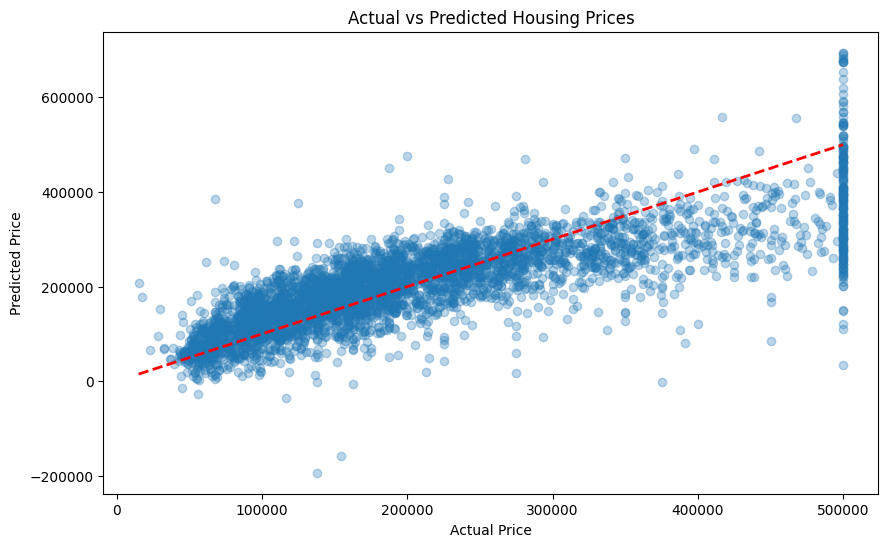

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Housing Prices')
plt.show()